<a href="https://colab.research.google.com/github/OliviaIntan/IPSD-Assignment/blob/main/Tugas%206/Unguided.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.metrics import davies_bouldin_score, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.neighbors import NearestNeighbors

# Load Data

In [67]:
# Melakukan load pada dataset yaitu data iris
data = pd.read_csv('/content/Dataset-Tugas - Dataset-Tugas.csv')

# Menampilkan 5 baris pertama data
data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
# Melihat ukuran data
data.shape

(150, 5)

# Hapus Kolom Target

In [29]:
# Mengecek informasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [68]:
# Menghapus kolom target 'class'
DataUpdate = data.drop(columns=['class'])

# Exploratory Data Analysis dan Pre-Processing

In [5]:
# Melihat informasi ulang data
DataUpdate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [32]:
# Melihat statistik deskriptif
DataUpdate.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [33]:
# Mengecek missing value datau data yang hilang
DataUpdate.isnull().sum()

,0
sepal length,0
sepal width,0
petal length,0
petal width,0


Tidak ada missing value pada data

In [34]:
# Mengecek data duplikat
DataUpdate.duplicated().sum()

3

In [35]:
# Menampilkan data duplikat
data_duplikat = DataUpdate[DataUpdate.duplicated()]
print(data_duplikat)

     sepal length  sepal width  petal length  petal width
34            4.9          3.1           1.5          0.1
37            4.9          3.1           1.5          0.1
142           5.8          2.7           5.1          1.9


Karena hanya 2 data yang memiliki pola yang sama, maka dibiarkan saja.

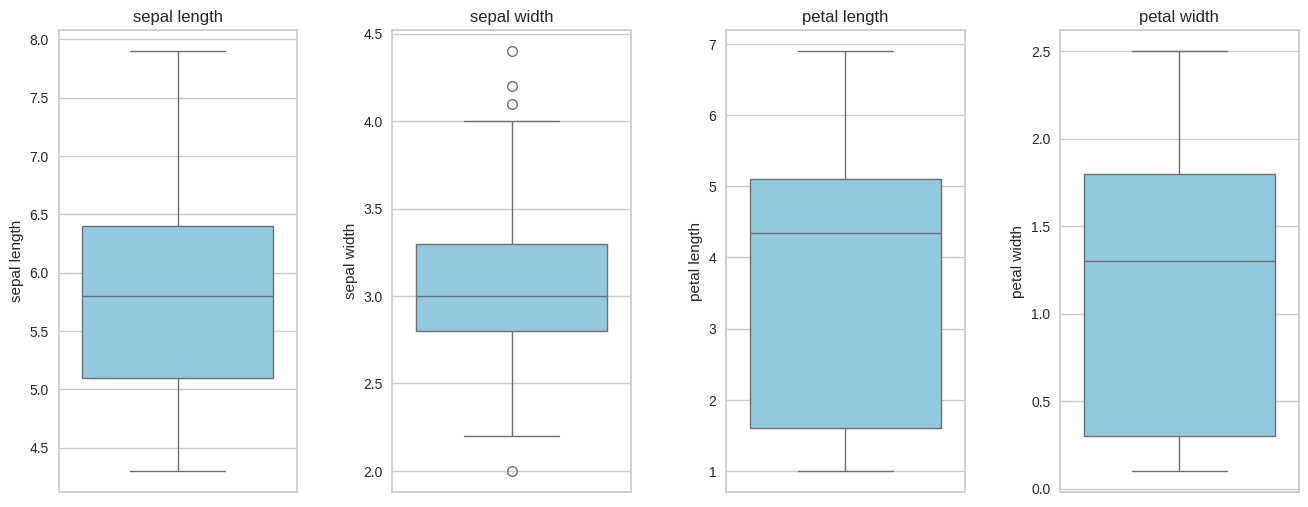

In [36]:
# Melihat box plot setiap fitur
def box_plot(data):
    # Mendefinisikan variabel yang akan divisualisasikan
    variables = ['sepal length', 'sepal width', 'petal length', 'petal width']

    # Buat figure dan axes untuk subplot dengan ukuran 1x4 (karena ada 4 variabel)
    fig, axes = plt.subplots(1, 4, figsize=(16, 6))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    # Iterasi melalui setiap variabel dan buat boxplot
    for i, var in enumerate(variables):
        sns.boxplot(y=var, data=data, color='skyblue', ax=axes[i])
        axes[i].set_title(var)

    # Tampilkan plot
    plt.show()

# Panggil fungsi box_plot dengan dataset Anda
box_plot(DataUpdate)


Terlihat bahwa kolom sepal length tidak memiliki outlier, dengan median berada di sekitar 5.8–6.0. Kemudian, kolom sepal width terlihat memiliki beberapa outlier di atas nilai 4.0 dan satu outlier di bawah 2.0, dengan median berada di sekitar 3.0. Lalu, kolom petal length terlihat tidak memiliki outlier, dengan median berada di sekitar 4.5. Terakhir, kolom petal width yang terlihat tidak memiliki outlier, dengan median berada di sekitar 1.3.

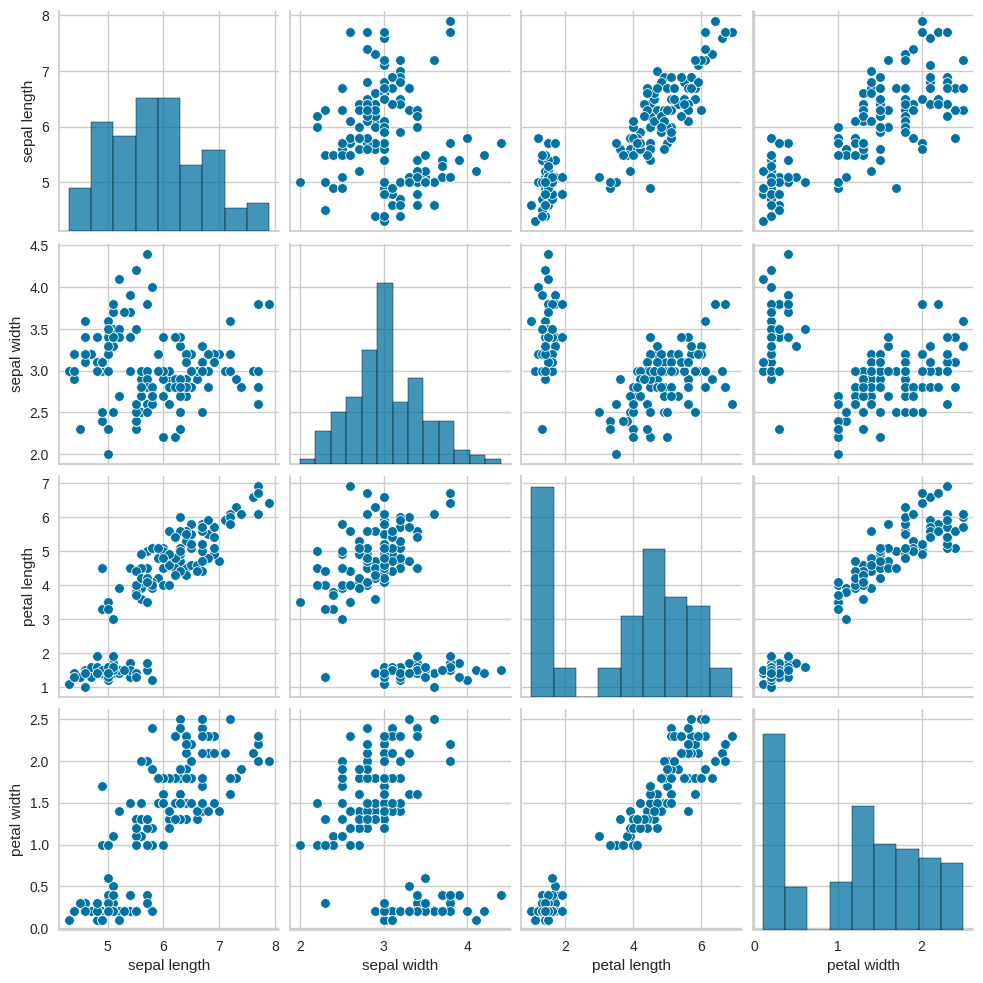

In [37]:
# Analisis hubungan antar fitur dengan pairplot
sns.pairplot(DataUpdate)
plt.show()

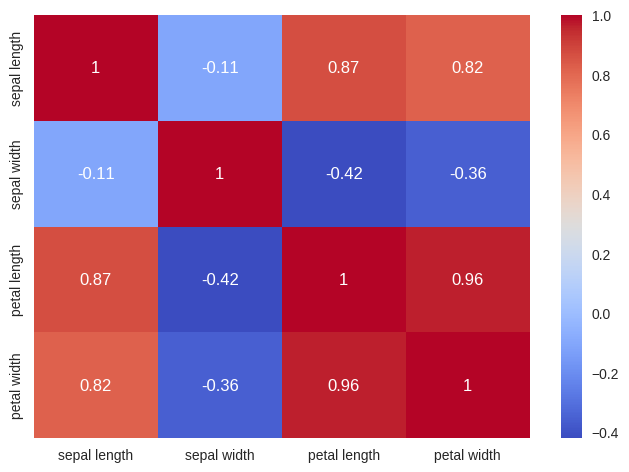

In [38]:
# Memeriksa korelasi antar fitur
corr_matrix = DataUpdate.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Terlihat bahwa skor korelasi antar fitur dominan tinggi, seperti fitur 'petal width' dengan 'petal length' memiliki skor sebesar sebesar 0.96 dan 'petal length' dengan 'sepal length' memiliki skor sebesar 0.87. Hal ini menunjukkan antar fitur saling berkolerasi secara kuat.

In [69]:
# Normalisasi data
scaler = MinMaxScaler()

# fit_transform
X_scaled = scaler.fit_transform(DataUpdate)
X_scaled

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

Menggunakan MinMax Scaler karena data tidak memiliki distribusi normal dan rentangnya sangat berbeda. Pre-processing menggunakan MinMax Scaler ini juga bertujuan untuk mengubah data sehingga berada dalam rentang [0, 1].

# Pemodelan dengan Algoritma K-Means

<function matplotlib.pyplot.show(close=None, block=None)>

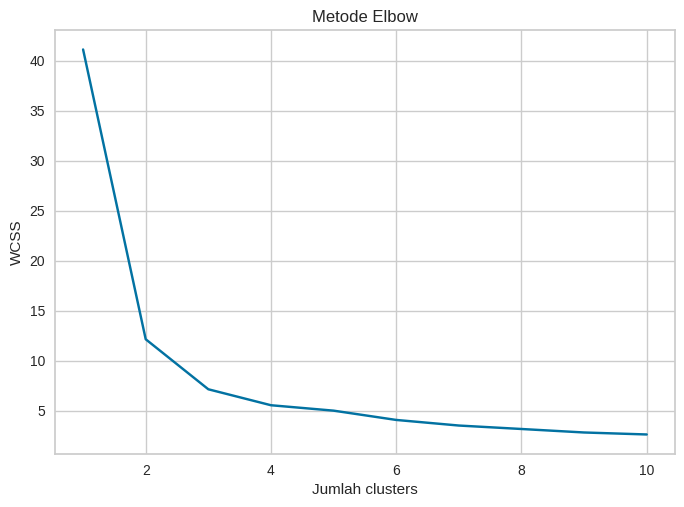

In [70]:
# Menggunakan metode elbow untuk menentukan nilai k
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show

Terlihat bahwa nilai WCSS (Within-Cluster Sum of Squares) turun tajam pada jumlah cluster sekitar 2, dan kemudian mulai datar setelahnya. Karena jumlah cluster yang optimal ditentukan berdasarkan titik di mana penurunan WCSS mulai melambat, sehingga didapat jumlah cluster = 2.

In [71]:
# Menjalankan K-Means Clustering ke dataset yang telah dinormalisasi 'X_scaled'
model1 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_pred1 = model1.fit_predict(X_scaled)

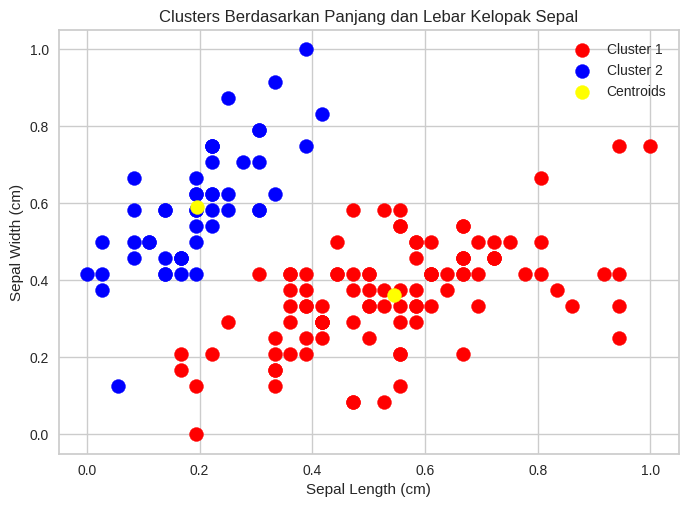

In [72]:
# Visualisasi hasil cluster
plt.scatter(X_scaled[y_pred1 == 0, 0], X_scaled[y_pred1 == 0, 1],
            s=100, c='red', label='Cluster 1')

plt.scatter(X_scaled[y_pred1 == 1, 0], X_scaled[y_pred1 == 1, 1],
            s=100, c='blue', label='Cluster 2')

plt.scatter(model1.cluster_centers_[:, 0], model1.cluster_centers_[:, 1],
            s=100, c='yellow', label='Centroids')

plt.title('Clusters Berdasarkan Panjang dan Lebar Kelopak Sepal')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

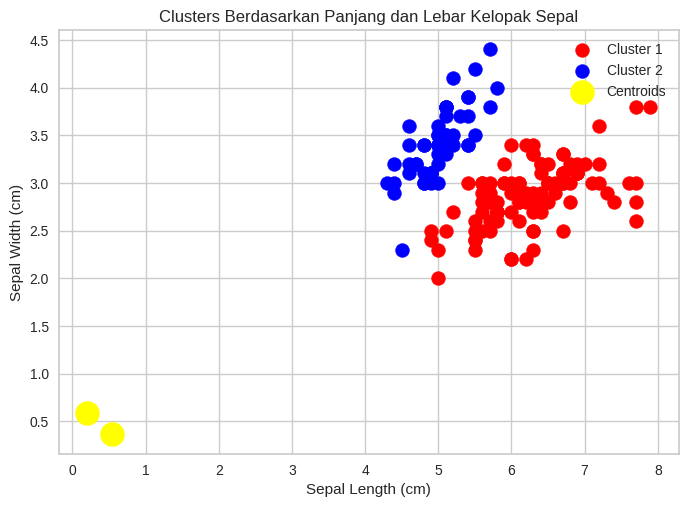

In [73]:
# Menyimpan Label model
DataUpdate['Label_K-Means'] = model1.labels_

# Visualisasi hasil clusters
plt.scatter(DataUpdate.values[y_pred1 == 0, 0], DataUpdate.values[y_pred1 == 0, 1],
            s = 100, c = 'red', label = 'Cluster 1')

plt.scatter(DataUpdate.values[y_pred1 == 1, 0], DataUpdate.values[y_pred1 == 1, 1],
            s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(model1.cluster_centers_[:, 0],  model1.cluster_centers_[:, 1],
            s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters Berdasarkan Panjang dan Lebar Kelopak Sepal')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

# Pemodelan dengan Algoritma DB-Scan

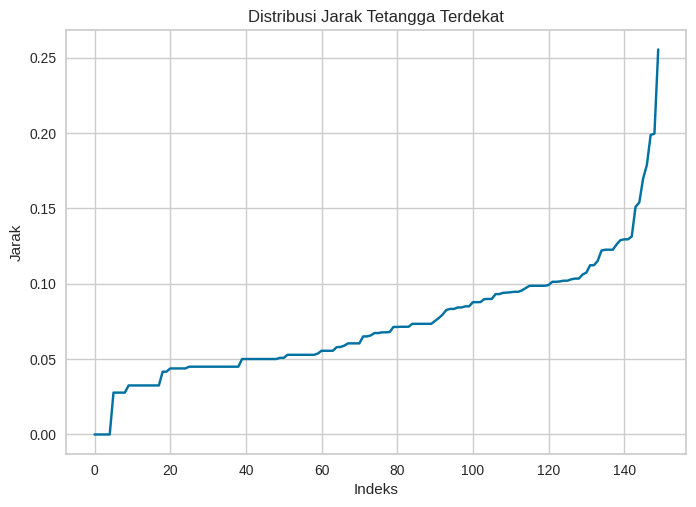

In [74]:
# Memilih nilai eps yang sesuai (yaitu tempat jarak mulai meningkat tajam)
# Mencari jarak tetangga terdekat untuk setiap titik
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Urutkan jarak dan plot
distances = np.sort(distances[:, 1], axis=0)
plt.plot(distances)
plt.title('Distribusi Jarak Tetangga Terdekat')
plt.xlabel('Indeks')
plt.ylabel('Jarak')
plt.show()

In [77]:
# Membuat objek DBSCAN dengan parameter epsilon yang telah dicari dan jumlah minimum sampel
model2 = DBSCAN(eps = 0.15, min_samples = 5)

# Melakukan clustering
model2.fit(X_scaled)

# Mendapatkan label untuk setiap data (-1 menandakan noise)
y_pred2 = model2.labels_
y_pred2

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

Terlihat array berisi nilai 0, -1, dan 1. Nilai negatif dalam hasil DBSCAN menunjukkan noise. Ini berarti data tersebut tidak termasuk dalam cluster mana pun karena tidak memenuhi kriteria kedekatan (eps) dan jumlah titik minimum (min_samples) dalam jaraknya.

In [78]:
# Tambahkan label tersebut menjadi kolom baru di dataset
DataUpdate['Label_DB-Scan'] = model2.labels_
DataUpdate.head()

,sepal length,sepal width,petal length,petal width,Label_K-Means,Label_DB-Scan
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0


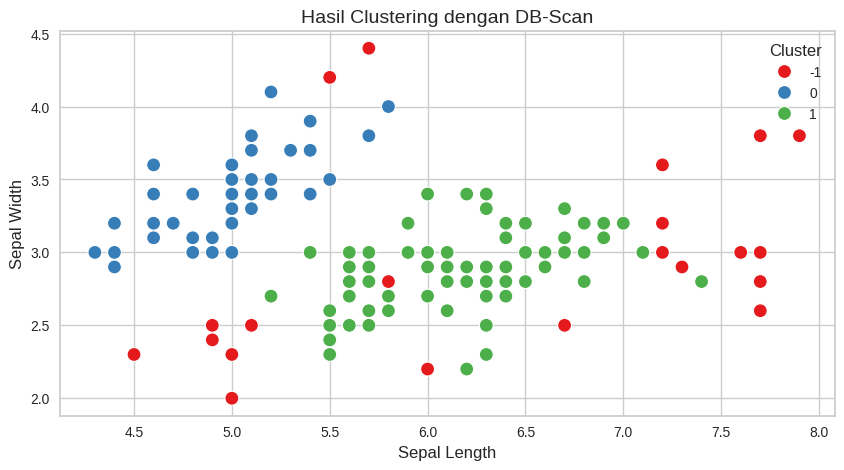

In [79]:
# Tambahkan label hasil clustering DB-Scan menjadi kolom baru
DataUpdate['Label_DB-Scan'] = model2.labels_

# Plot scatter hasil clustering
plt.figure(figsize=(10, 5))

sns.scatterplot(
    x='sepal length', y='sepal width',
    hue='Label_DB-Scan',               # Warna berdasarkan hasil clustering
    data=DataUpdate, palette='Set1',   # Gunakan palet bawaan seaborn, seperti 'Set1'
    s=100                              # Ukuran marker
)

# Tambahkan judul dan label untuk plot
plt.title('Hasil Clustering dengan DB-Scan', fontsize=14)
plt.xlabel('Sepal Length', fontsize=12)
plt.ylabel('Sepal Width', fontsize=12)
plt.legend(title='Cluster', fontsize=10, title_fontsize=12)
plt.show()


# Plot Hasil Permodelan Algoritma K-means dan DB-Scan!

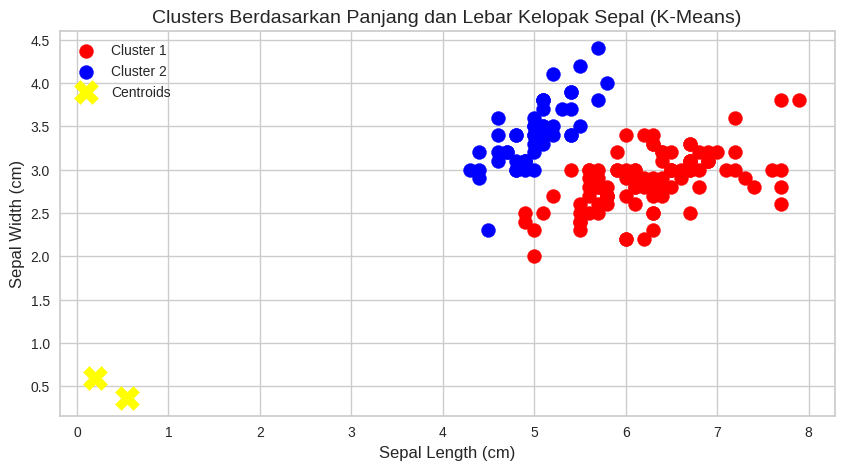

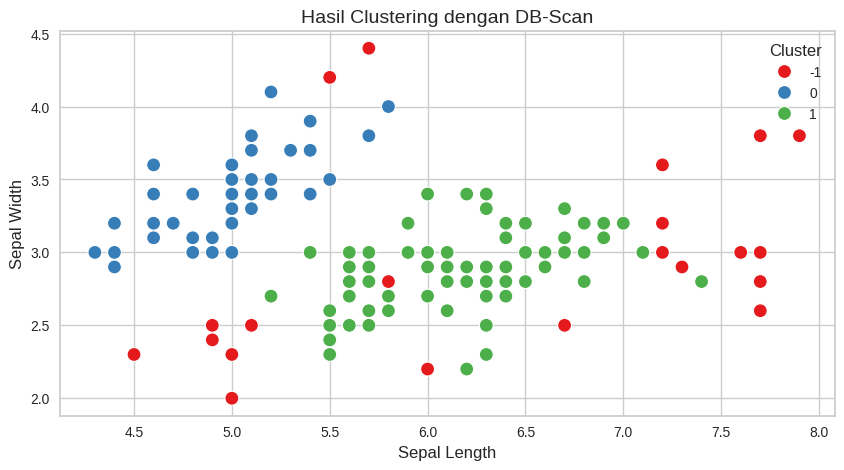

In [80]:
# Plot hasil clustering dengan K-Means
plt.figure(figsize=(10, 5))
plt.scatter(
    DataUpdate.iloc[y_pred1 == 0, 0], DataUpdate.iloc[y_pred1 == 0, 1],
    s=100, c='red', label='Cluster 1'
)
plt.scatter(
    DataUpdate.iloc[y_pred1 == 1, 0], DataUpdate.iloc[y_pred1 == 1, 1],
    s=100, c='blue', label='Cluster 2'
)
# Plot centroid K-Means
plt.scatter(
    model1.cluster_centers_[:, 0], model1.cluster_centers_[:, 1],
    s=300, c='yellow', marker='X', label='Centroids'
)
plt.title('Clusters Berdasarkan Panjang dan Lebar Kelopak Sepal (K-Means)', fontsize=14)
plt.xlabel('Sepal Length (cm)', fontsize=12)
plt.ylabel('Sepal Width (cm)', fontsize=12)
plt.legend(fontsize=10)
plt.show()


# Plot hasil clustering dengan DB-Scan
plt.figure(figsize=(10, 5))
sns.scatterplot(
    x='sepal length', y='sepal width',
    hue='Label_DB-Scan',
    data=DataUpdate, palette='Set1',
    s=100
)
plt.title('Hasil Clustering dengan DB-Scan', fontsize=14)
plt.xlabel('Sepal Length', fontsize=12)
plt.ylabel('Sepal Width', fontsize=12)
plt.legend(title='Cluster', fontsize=10, title_fontsize=12)
plt.show()


Berdasarkan kedua plot di atas, didapatkan hasil:
1. Plot pertama (K-Means Clustering)
- Cluster 1 (Merah) dan Cluster 2 (Biru) terlihat terpisah dengan jelas berdasarkan dua fitur, yaitu panjang dan lebar kelopak sepal.
- Terdapat centroids (titik berwarna kuning) yang mewakili titik tengah dari masing-masing cluster.
- Terlihat model memisahkan data ke dalam dua kelompok dan masing-masing cluster cukup terpisah dengan baik.


2. Plot kedua (DB-Scan Clustering):
- Terdapat tiga cluster yang terbentuk: Cluster 0 (Biru), Cluster 1 (Hijau), dan Cluster -1 (Merah).
- Cluster dengan label -1 adalah noise
- DB-Scan menangani data dengan cara mengidentifikasi dan mengisolasi beberapa titik sebagai noise (merah)

# Matriks Evaluasi

# 1.  Silhouette score

In [81]:
# Menghitung silhouette_score algoritma k-means
Evaluasi_KMeans = silhouette_score(X_scaled, y_pred1)
print('Silhouette Score:', Evaluasi_KMeans)

Silhouette Score: 0.6294675561906644


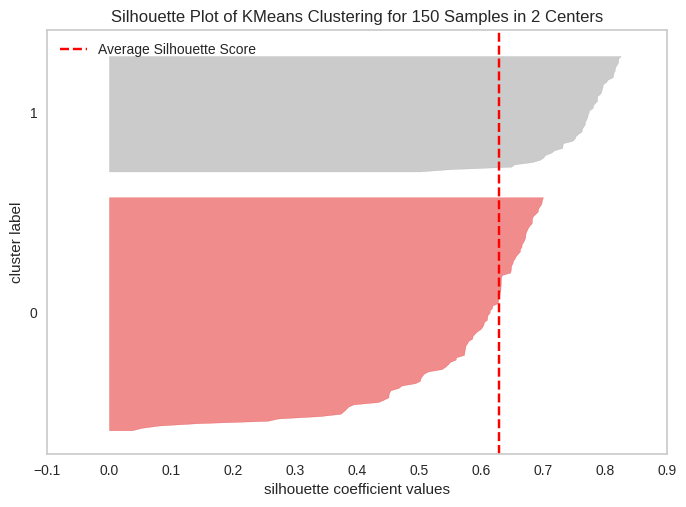

In [82]:
# Membuat Silhouette vizualitation untuk algoritma k-means
silhouette_viz = SilhouetteVisualizer(model1)
silhouette_viz.fit(X_scaled)
plt.grid(False)
silhouette_viz.show()
plt.show()

In [83]:
# Menghitung algoritma Silhouette_score algoritma db-scan
Evaluasi_DBScan = silhouette_score(X_scaled, y_pred2)
print('Silhouette Score:', Evaluasi_DBScan)

Silhouette Score: 0.4357288238741261


Matriks evaluasi Silhouette Score mengukur sejauh mana data dalam satu cluster lebih dekat dengan data di cluster yang sama dibandingkan dengan data di cluster lain. Nilai yang mendekati 1 menunjukkan bahwa data dalam cluster lebih kompak dan terpisah dengan baik dari cluster lain.

Terlihat bahwa nilai evaluasi Silhouette_score algoritma K-Means sebesar 0.629, sedangkan nilai evaluasi Silhouette_score algoritma DB-Scan sebesar 0.436. Ini menunjukkan bahwa pada matriks evaluasi Silhouette_score K-Means adalah model clustering yang lebih baik daripada DB-Scan, karena yang paling mendekati nilai 1.

# 2. Davies-Bouldin Index

In [84]:
# Menghitung Davies Bouldin Index (DBI) algoritma k-means
dbi_score1 = davies_bouldin_score(X_scaled, y_pred1)
print('Davies-Bouldin Index (DBI):', dbi_score1)

Davies-Bouldin Index (DBI): 0.48770481288357487


In [85]:
# Menghitung Davies Bouldin Index (DBI) algoritma db-scan
dbi_score2 = davies_bouldin_score(X_scaled, y_pred2)
print('Davies-Bouldin Index (DBI):', dbi_score2)

Davies-Bouldin Index (DBI): 7.790507153668116


Davies Bouldin Index (DBI) mengukur kualitas clustering berdasarkan compactness dan separation. Nilai yang lebih rendah menunjukkan clustering yang lebih baik.

Terlihat bahwa nilai evaluasi Davies Bouldin Index (DBI) algoritma K-Means sebesar 0.487, sedangkan nilai evaluasi Davies Bouldin Index (DBI) algoritma DB-Scan sebesar 7.79. Ini menunjukkan bahwa pada matriks evaluasi Davies Bouldin Index (DBI) K-Means adalah model clustering yang lebih baik daripada DB-Scan, karena merupakan nilai yang paling rendah.

# Kesimpulan

Berdasarkan kedua matriks evaluasi yang diberikan, yaitu Silhouette Score dan Davies-Bouldin Index (DBI), dapat ditentukan bahwa model yang paling baik dengan nilai evaluasi terbaik adalah K-Means. Ini menunjukkan bahwa model K-Means memberikan hasil clustering yang lebih terpisah dan kompak.